# Question
Train a logistic regression model on a given diagnostic dataset (dataset from kaggle) and evaluate its performance by calculating the accuracy of the model on a test set.

1. Model Evaluation: In addition to accuracy, find other performance metrics like precision, recall, F1-score, or ROC-AUC and plot confusion matrices or ROC curves to see the model performance.
2. Hyperparameter Tuning: Use techniques such as cross-validation or grid search to optimize the model’s parameters and then check model performance again and see if there is any improvement in model’s accuracy. 
3. Analyse feature importance or coefficients to understand which features are driving the predictions.

Hint: Refer the following documents: 
classification2_binary.ipynb, 
Telco-Customer-Churn.csv

For diagnostic dataset: Refer Kaggle https://www.kaggle.com/datasets, 
Sample dataset: https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data (You can work n his one or a similar one)


Reference: https://github.com/susanli2016/Machine-Learning-with-Python/blob/master/Logistic%20Regression%20in%20Python%20-%20Step%20by%20Step.ipynb

# Classification

##  Introduction to Classification

- Classification, like regression, is a predictive task, but one in which the outcome takes only values across discrete categories; classification problems are very common (arguably just as or perhaps even more common than regression problems!)
  
- **Examples:**
  - Predicting whether a patient will develop  cancer or remain healthy, given its current health related information.
  - Predicting whether or not a user will like a new product, based on user covariates and a history of his/her previous ratings.

  
- Classification is fundamentally a different problem than regression, and so, we will need different tools. In this lecture, we will learn one of the most common tools: logistic regression. You should know that there are many, many more methods beyond this one (just like there are many methods for estimating the regression function).


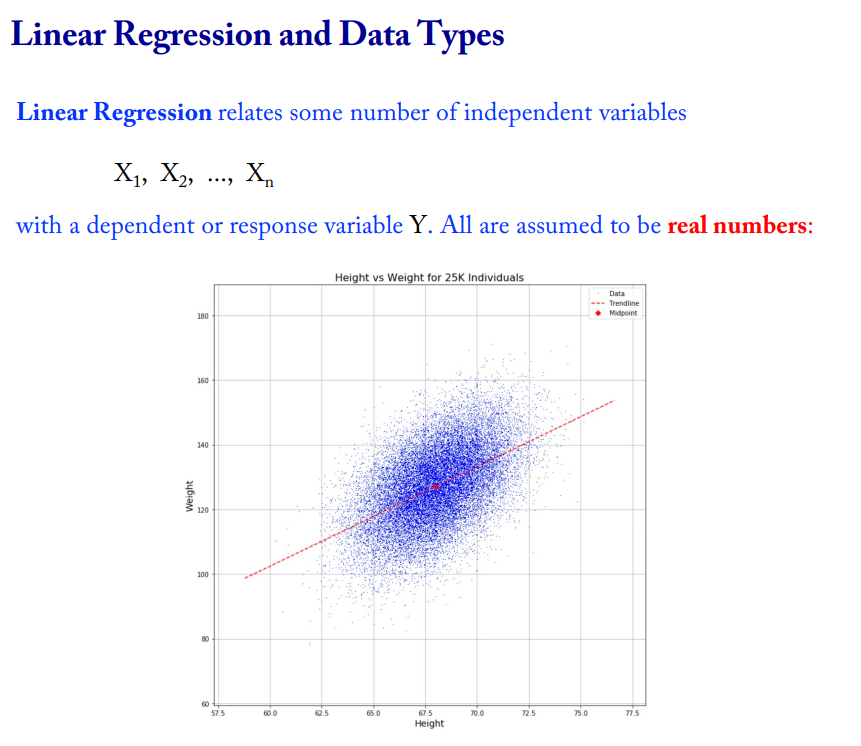

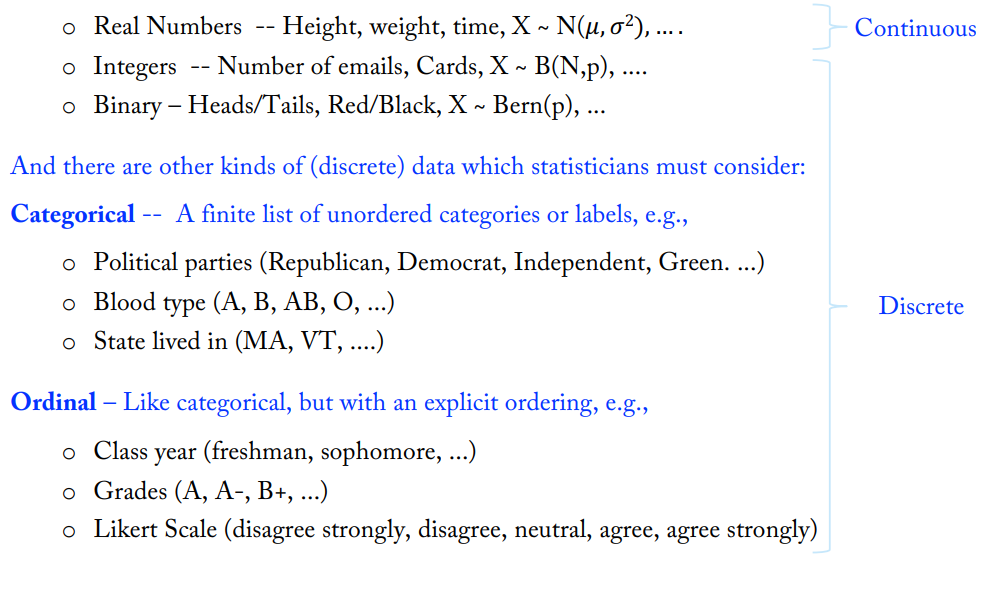

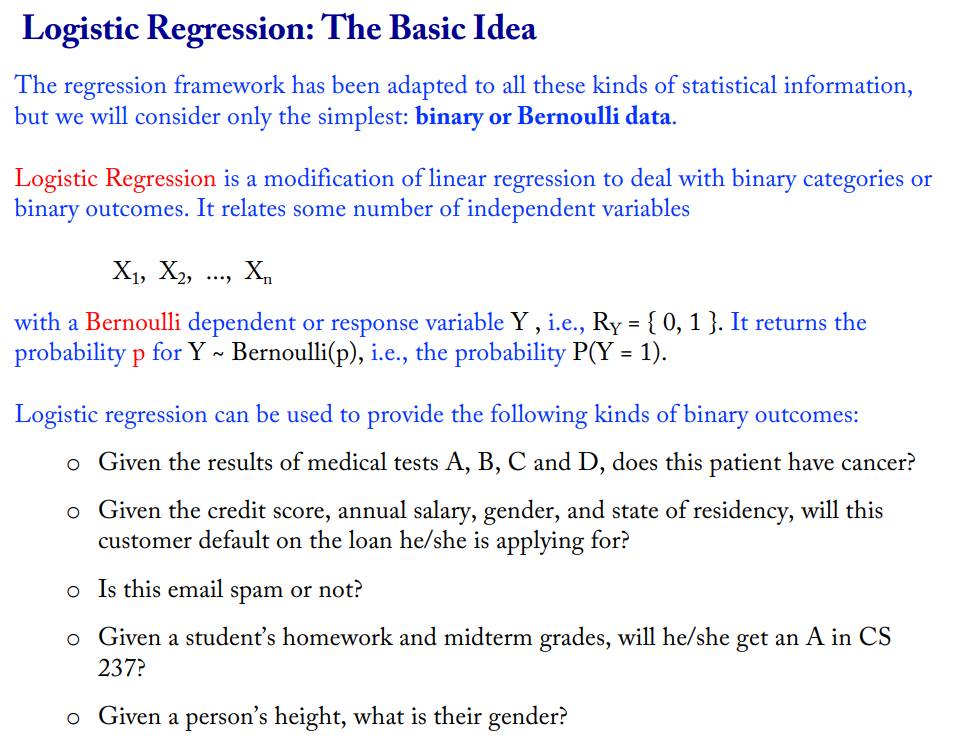

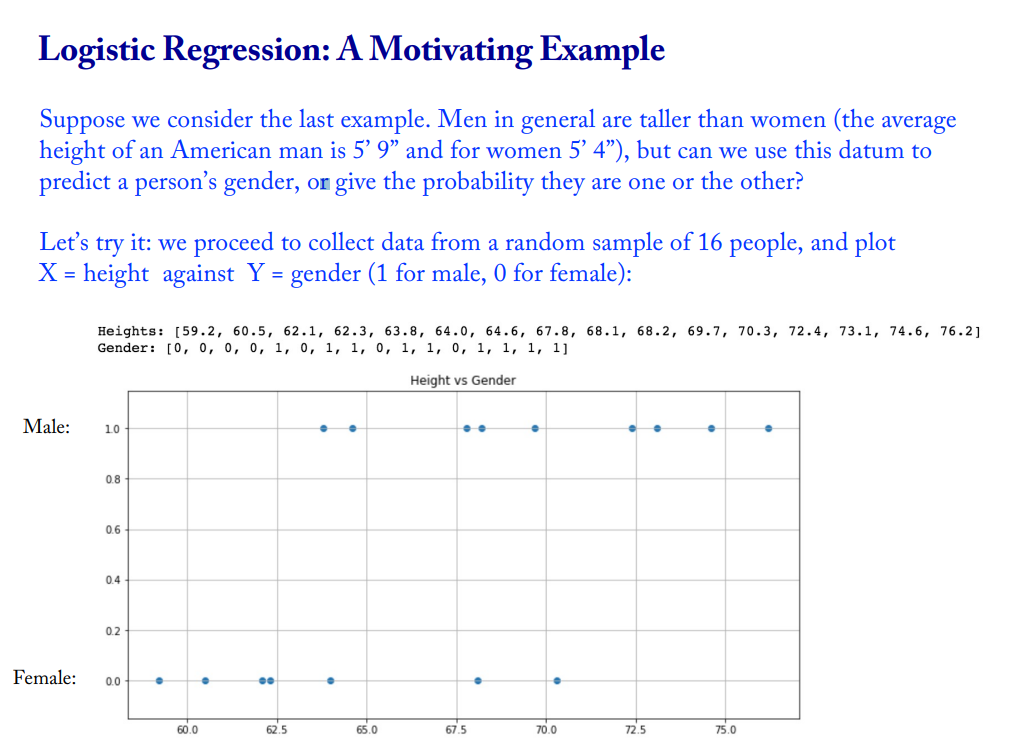

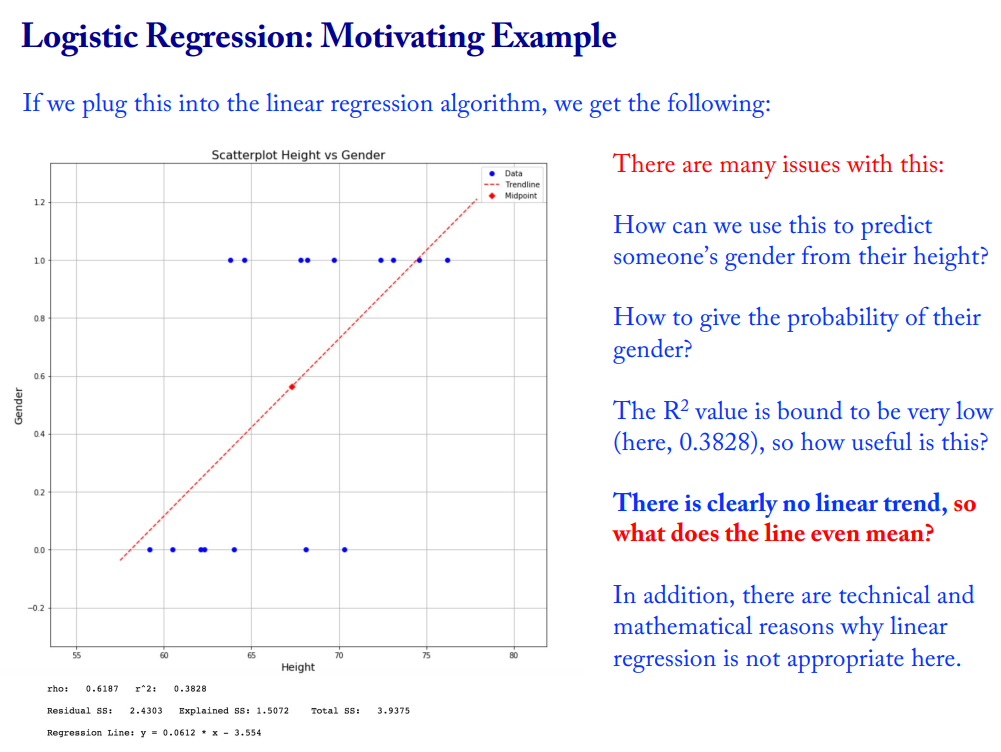

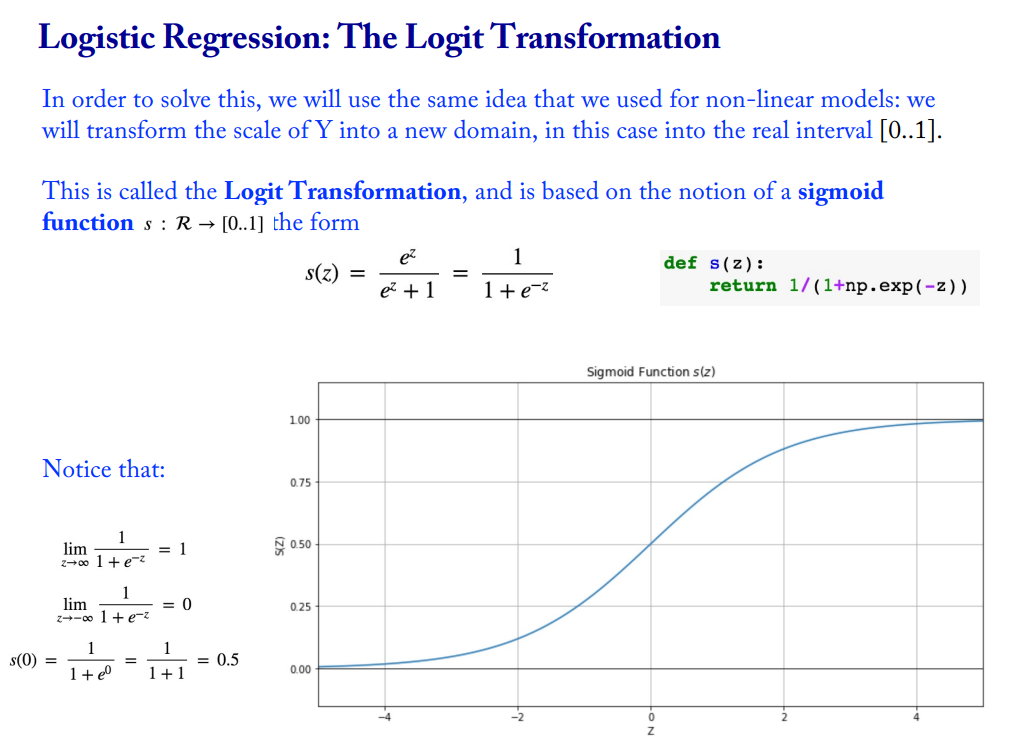

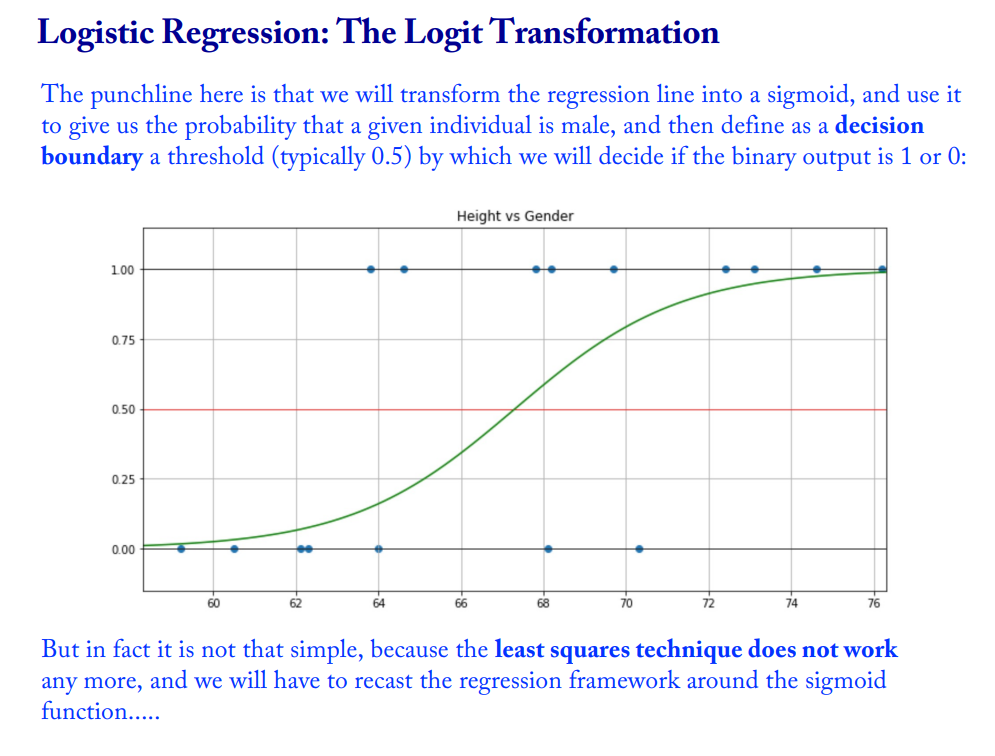

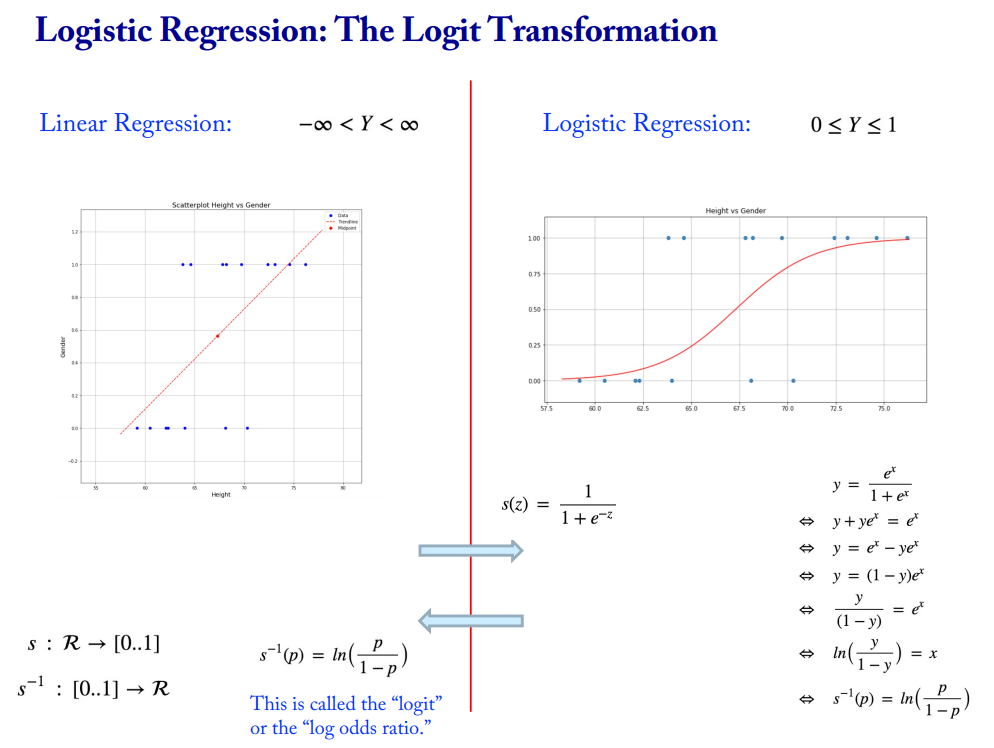

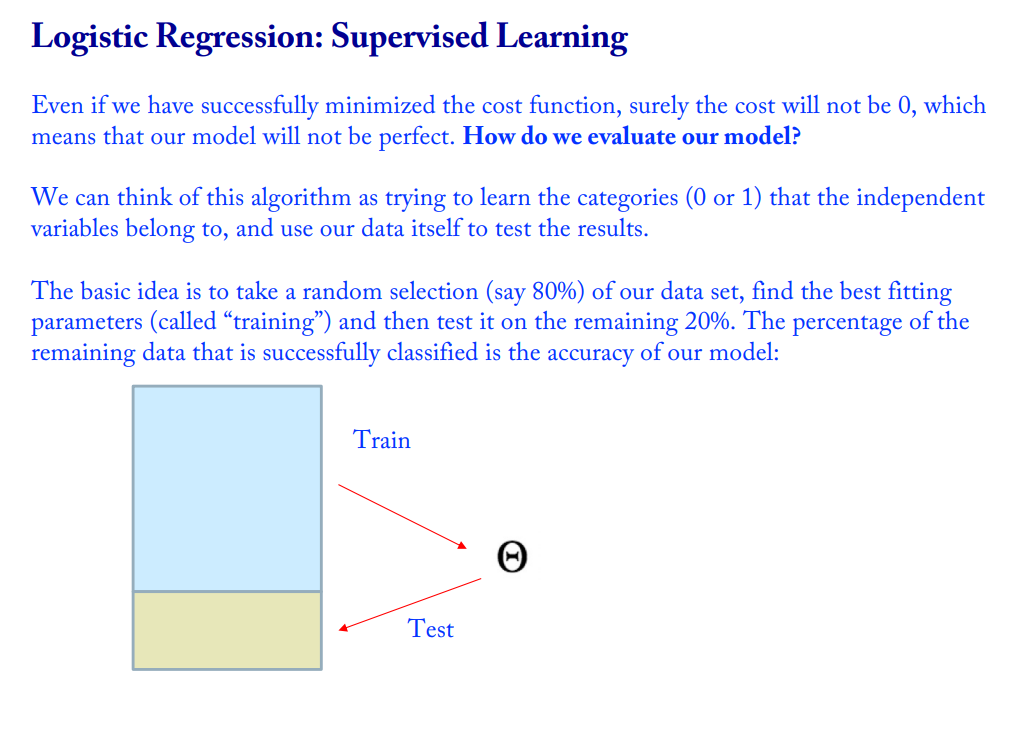

In [2]:
import pandas as pd


In [3]:
 #Load the dataset
data = pd.read_csv('heart.csv')
data = data.dropna()
print(data.shape)
print(list(data.columns))

(303, 14)
['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output']


In [4]:
data.head()

age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0   63    1   3     145   233    1        0       150     0      2.3    0   
1   37    1   2     130   250    0        1       187     0      3.5    0   
2   41    0   1     130   204    0        0       172     0      1.4    2   
3   56    1   1     120   236    0        1       178     0      0.8    2   
4   57    0   0     120   354    0        1       163     1      0.6    2   

   caa  thall  output  
0    0      1       1  
1    0      2       1  
2    0      2       1  
3    0      2       1  
4    0      2       1

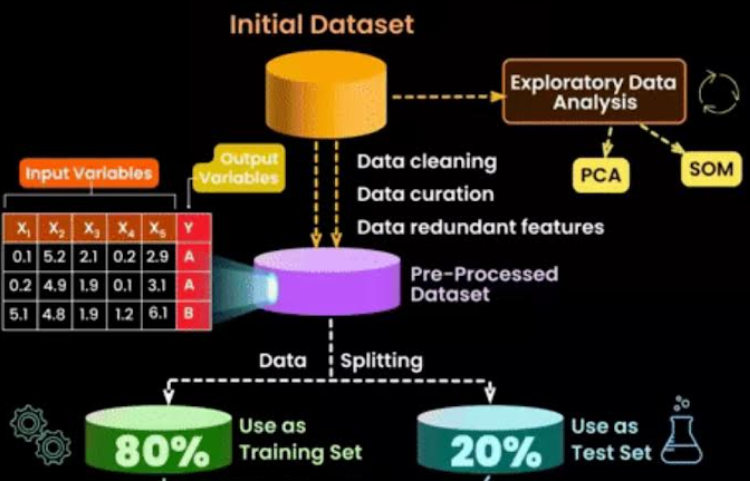

In [5]:
# Split the data into features and target variable
X = data.drop('output', axis=1)
y = data['output']


In [6]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
X_train.shape

(242, 13)

In [8]:
X_test.shape

(61, 13)

In [9]:
# Create a logistic regression model

In [10]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [11]:
# Train the model on the training set
model.fit(X_train, y_train)

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [12]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [13]:
y_prob = model.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class

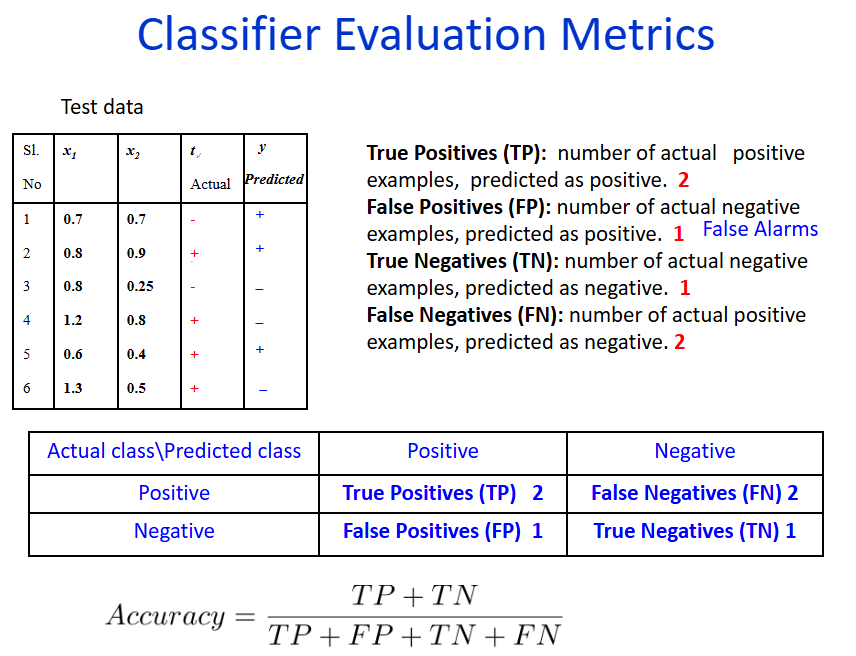

In [14]:
# Calculate accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)



Accuracy: 0.8852459016393442


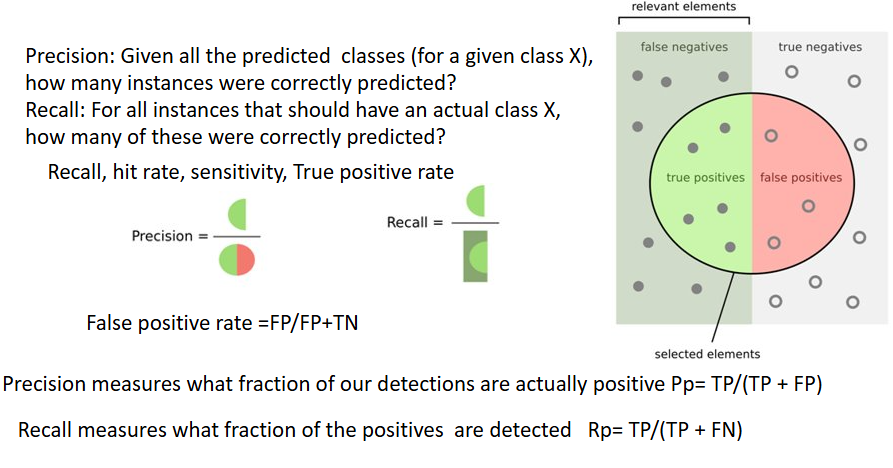

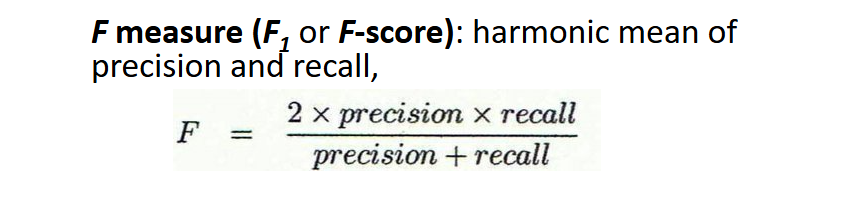

In [15]:
# Calculate other performance metrics
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test,  y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("ROC-AUC:", roc_auc)

Precision: 0.8787878787878788
Recall: 0.90625
F1-score: 0.8923076923076924
ROC-AUC: 0.8841594827586207


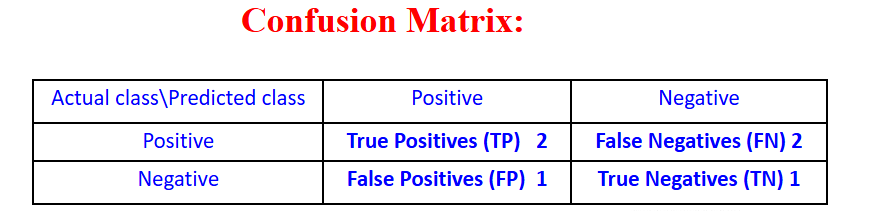

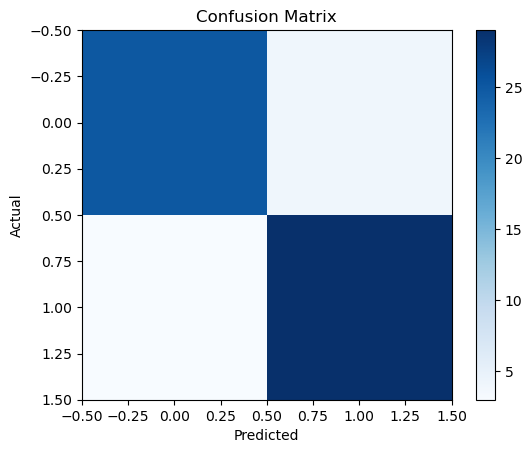

In [16]:
# Plot confusion matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

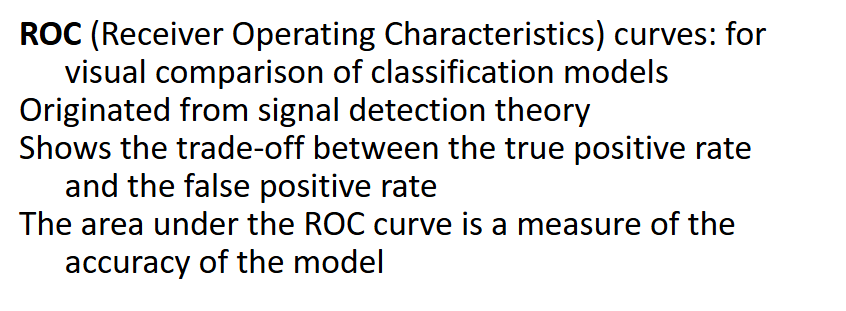

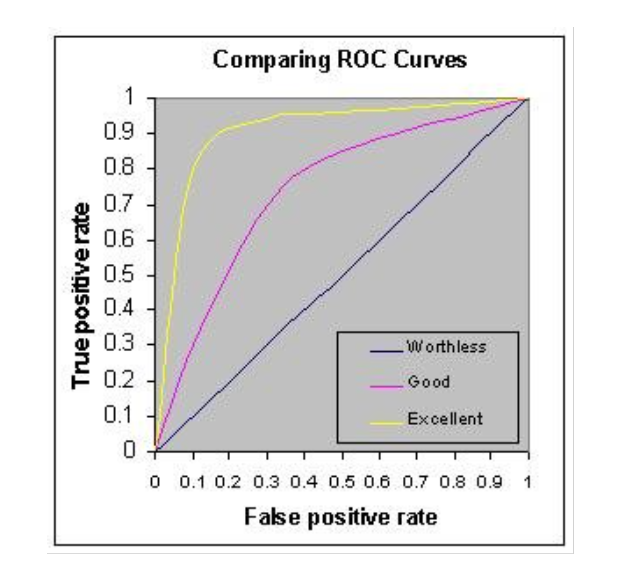

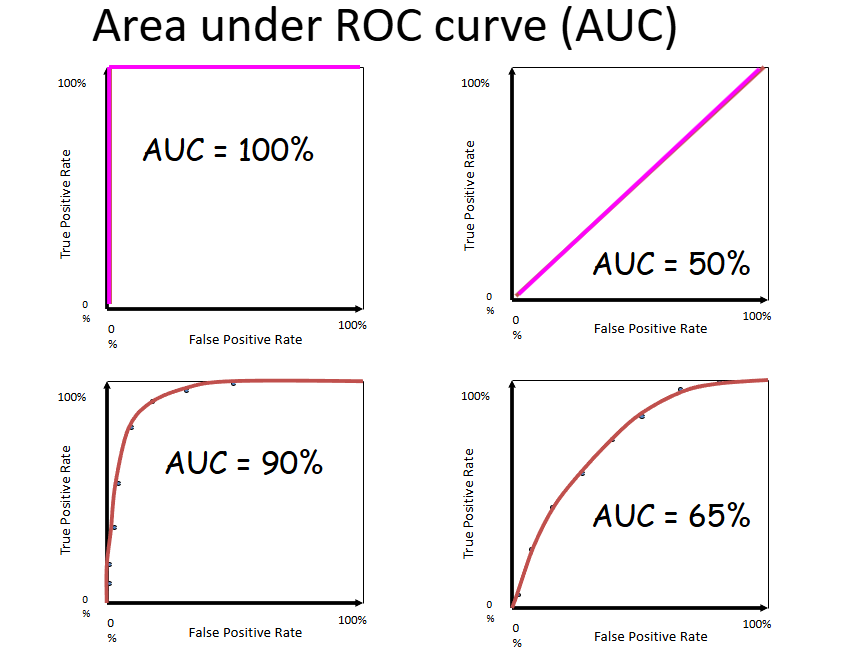

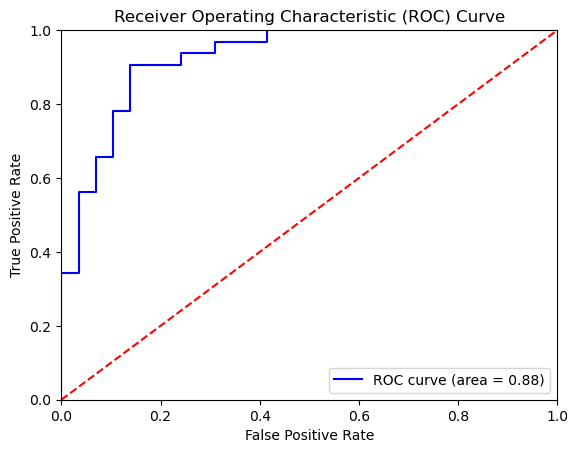

In [17]:
# Step 7: Plot ROC curve
# Step 6: Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure()
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

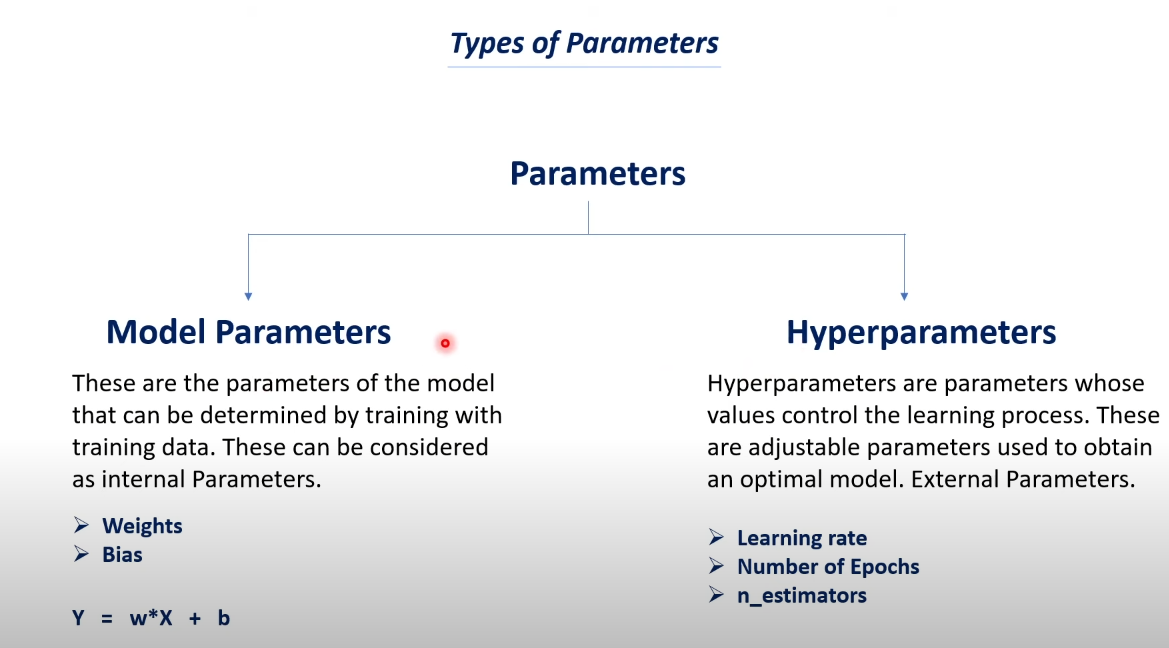

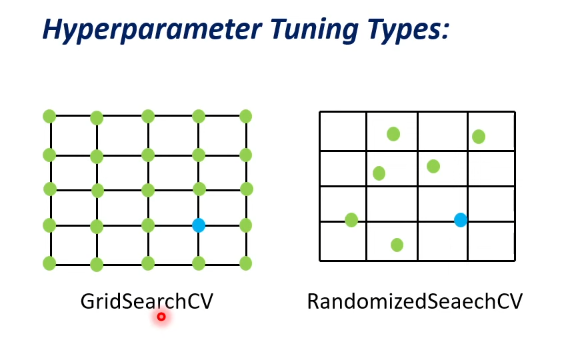

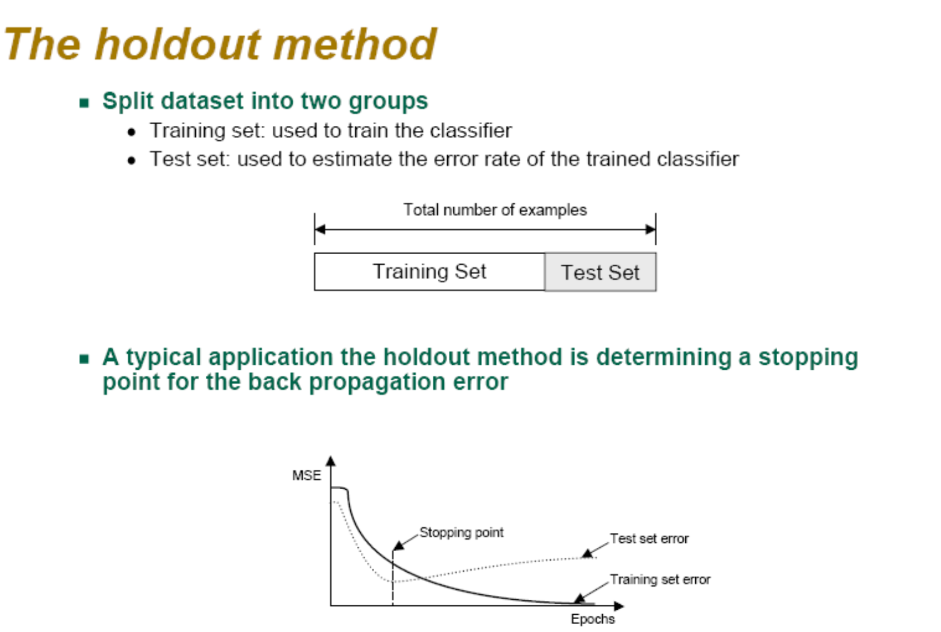

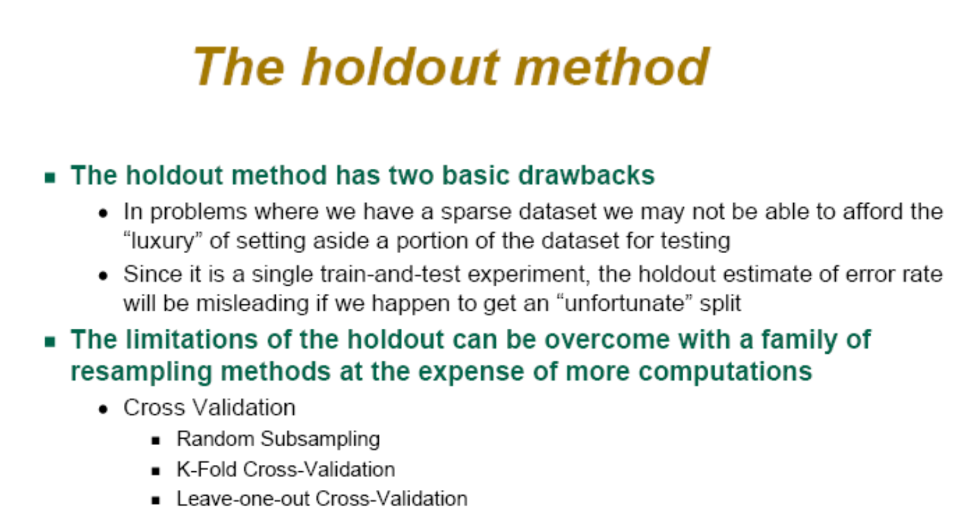

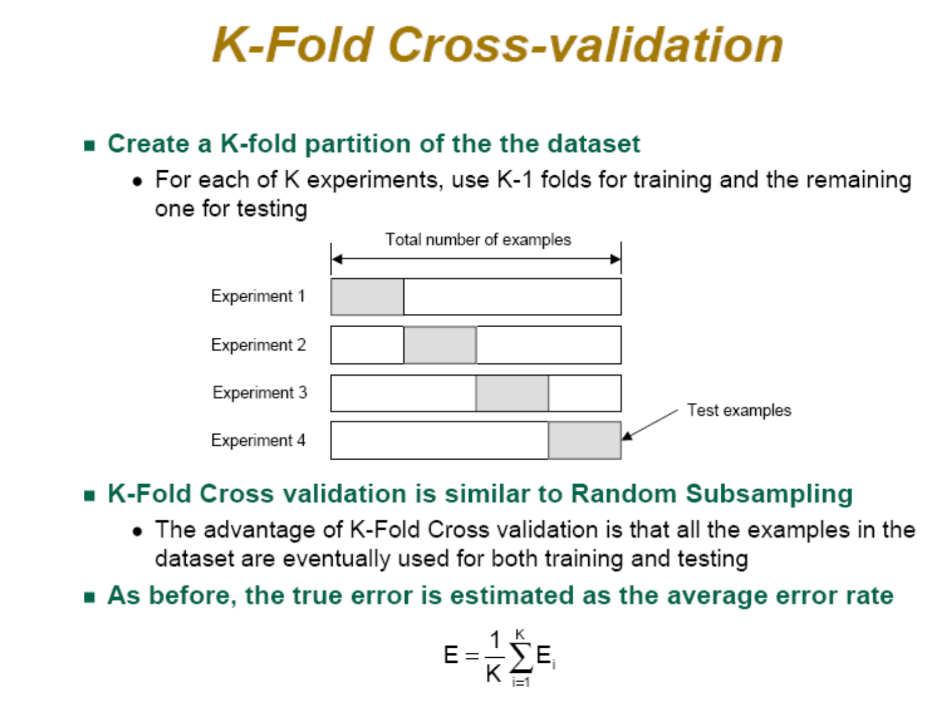

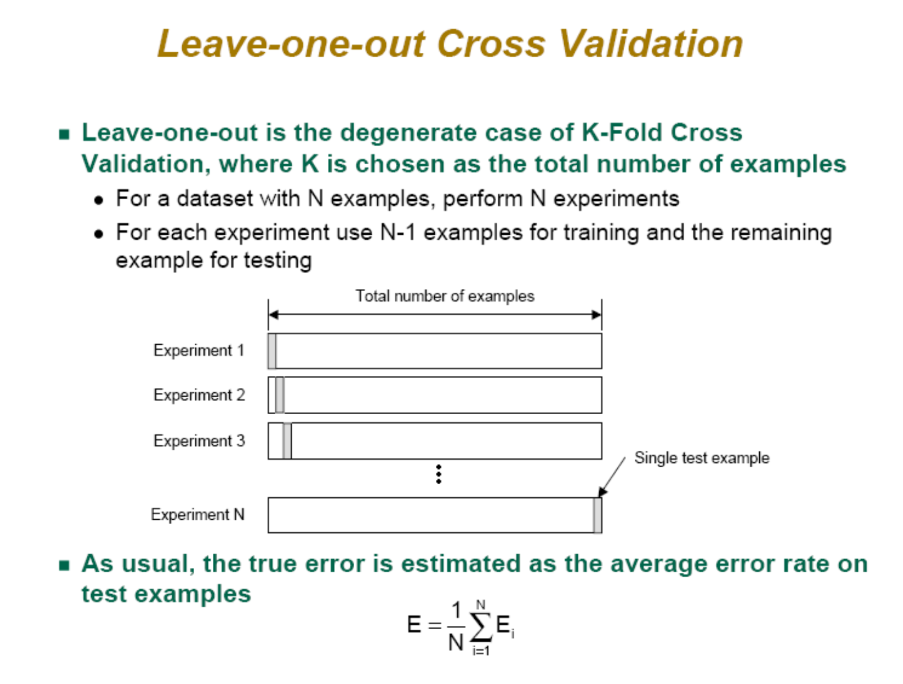

In [18]:
import warnings
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Define the Logistic Regression model with default hyperparameters
model = LogisticRegression(max_iter=1000)

# Perform cross-validation with 5 folds
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')

# Print the accuracy for each fold
print(f"Cross-validation scores: {cv_scores}")

# Calculate the average cross-validation score
mean_cv_score = cv_scores.mean()
print(f"Mean cross-validation accuracy: {mean_cv_score * 100:.2f}%")

# Train the final model on the entire training set
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model's accuracy on the test data
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the model on test data: {accuracy * 100:.2f}%")


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Cross-validation scores: [0.79591837 0.87755102 0.77083333 0.83333333 0.79166667]
Mean cross-validation accuracy: 81.39%
Accuracy of the model on test data: 88.52%


In [28]:
import warnings
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],        # Regularization strength
    'penalty': ['l1', 'l2'],              # L1 or L2 regularization
    'solver': ['liblinear', 'saga']       # Solvers that support l1 and l2
}


# Perform grid search to tune hyperparameters
grid_search = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=10)
grid_search.fit(X_train, y_train)

# Best hyperparameters
print(f"Best Parameters: {grid_search.best_params_}")

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which 

Best Parameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [29]:
# Get the best hyperparameters from grid search
best_params = grid_search.best_params_

# Train a new Logistic Regression model with the best hyperparameters
best_model = LogisticRegression(
    C=best_params['C'], 
    penalty=best_params['penalty'], 
    solver=best_params['solver'], 
    max_iter=1000
)

# Fit the model on the training data
best_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_best = best_model.predict(X_test)

# Evaluate the model's accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred_best)
print(f"Accuracy of the model with tuned hyperparameters: {accuracy * 100:.2f}%")


Accuracy of the model with tuned hyperparameters: 88.52%


In [30]:
# Analyze feature importance
feature_importance = best_model.coef_[0]
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
feature_importance_df.sort_values(by='Importance', ascending=False, inplace=True)
print(feature_importance_df) 

     Feature  Importance
2         cp    0.574248
10       slp    0.341910
6    restecg    0.209220
5        fbs    0.024336
7   thalachh    0.023925
0        age   -0.000409
4       chol   -0.001494
3     trtbps   -0.011565
8       exng   -0.455523
9    oldpeak   -0.517553
11       caa   -0.545677
12     thall   -0.549607
1        sex   -0.625312
